In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import pylab
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split # для манипулирования данными

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import confusion_matrix
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import seaborn as sns 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #% matplotlib inline
from art import tprint

url ="C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.data" 
url_2= "C:\\Users\\Admin\\Desktop\\datases\\UMAP\\soybean-large.names" 

In [ ]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"
            ]

# Read data from URL
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
# bob=bob[color[1:]] 

In [ ]:
bob.head(10)

In [ ]:

predictors, target =bob[color[1:]], bob[color[:1]] #  делим на то что есть и на то что предсказать 
x_train , x_test , y_train, y_test = train_test_split(predictors, target, random_state=0) # 1А разбить выборку на тренировочную и тестовую 
X, y = train_test_split(bob, random_state=0)

# SVM

In [ ]:
params={'kernel':['linear','rbf' ,  'poly', 'sigmoid'], 'C': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clf_SVC = svm.SVC()

grid_search= GridSearchCV(estimator=clf_SVC, param_grid=params)
grid_search.fit(x_train,y_train)
grid_search
# print(str(grid_search.best_score_))
# print(str(grid_search.best_estimator_))

y_pred_SVM= grid_search.predict(x_test)


In [71]:
max([int(i) for i in x_train['date'].to_list()])

6

In [72]:
list(x_train)

['date',
 'plant-stand',
 'precip',
 'temp',
 'hail',
 'crop-hist',
 'area-damaged',
 'severity',
 'seed-tmt',
 'germination',
 'plant-growth',
 'leaves',
 'leafspots-halo',
 'leafspots-marg',
 'leafspot-size',
 'leaf-shread',
 'leaf-malf',
 'leaf-mild',
 'stem',
 'lodging',
 'stem-cankers',
 'canker-lesion',
 'fruiting-bodies',
 'external decay',
 'mycelium',
 'int-discolor',
 'sclerotia',
 'fruit-pods',
 'fruit spots',
 'seed',
 'mold-growth',
 'seed-discolor',
 'seed-size',
 'shriveling',
 'roots']

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Admi

ValueError: X has 2 features, but SVC is expecting 35 features as input.

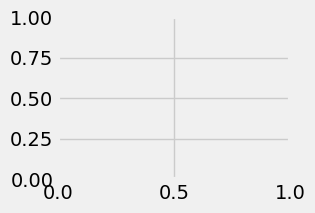

In [74]:

X = x_train#iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y =y_train# iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max =min([int(i) for i in x_train['date'].to_list()]) - 1, max([int(i) for i in x_train['date'].to_list()]) + 1
y_min, y_max = min([int(i) for i in x_train['plant-stand'].to_list()]) - 1, max([int(i) for i in x_train['plant-stand'].to_list()]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [ ]:
scaler = MinMaxScaler()
X= scaler.fit_transform(y_pred_SVM)

embed = TSNE(
    n_components=2, # значение по умолчанию=2. Размерность вложенного пространства.
    perplexity=20, # значение по умолчанию=30.0. Перплексия связана с количеством ближайших соседей, которое используется в других алгоритмах обучения на множествах.
    early_exaggeration=12, # значение по умолчанию=12.0. Определяет, насколько плотными будут естественные кластеры исходного пространстве во вложенном пространстве и сколько места будет между ними. 
    learning_rate=200, # значение по умолчанию=200.0. Скорость обучения для t-SNE обычно находится в диапазоне [10.0, 1000.0]. Если скорость обучения слишком высока, данные могут выглядеть как "шар", в котором любая точка приблизительно равноудалена от ближайших соседей. Если скорость обучения слишком низкая, большинство точек могут быть похожими на сжатое плотное облако с незначительным количеством разбросов. 
    n_iter=5000, # значение по умолчанию=1000. Максимальное количество итераций для оптимизации. Должно быть не менее 250.
    n_iter_without_progress=300, # значение по умолчанию=300. Максимальное количество итераций без прогресса перед прекращением оптимизации, используется после 250 начальных итераций с ранним преувеличением.
    min_grad_norm=0.0000001, # значение по умолчанию=1e-7. Если норма градиента ниже этого порога, оптимизация будет остановлена.
    metric='euclidean', # значение по умолчанию='euclidean', Метрика, используемая при расчете расстояния между экземплярами в массиве признаков.
    init='random',# {'random', 'pca'} или ndarray формы (n_samples, n_components), значение по умолчанию='random'. Инициализация вложения.
    verbose=0, # значение по умолчанию=0. Уровень детализации.
    random_state=42, # экземпляр RandomState или None, по умолчанию=None. Определяет генератор случайных чисел. Передача int для воспроизводимых результатов при многократном вызове функции.
    method='barnes_hut', # значение по умолчанию='barnes_hut'. По умолчанию алгоритм вычисления градиента использует аппроксимацию Барнса-Хата, работающую в течение времени O(NlogN). метод='exact' будет работать по более медленному, но точному алгоритму за время O(N^2). Следует использовать точный алгоритм, когда количество ошибок ближайших соседей должно быть ниже 3%.
    angle=0.5, # значение по умолчанию=0.5. Используется только если метод='barnes_hut' Это компромисс между скоростью и точностью в случае T-SNE с применением алгоритма Барнса-Хата.
    n_jobs=-1, # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
        )

# Преобразование X
X_embedded = embed.fit_transform(X)


# KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
y_pred_KNN = knn.predict(x_test)
params={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search= GridSearchCV(estimator=knn, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))



# Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_RF = random_forest.predict(x_test)
params= {'criterion':['gini', 'entropy', 'log_loss'] }
grid_search= GridSearchCV(estimator=random_forest, param_grid=params)
grid_search.fit(x_train,y_train)
print(str(grid_search.best_score_))
print(str(grid_search.best_estimator_))

In [ ]:
print('\n##################Последнее задание ######################\n')
metrics = []
models =  ['SVM' , 'KNN', 'Random_Forest']
predictions=[y_pred_SVM, y_pred_KNN, y_pred_RF]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(y_test, i, average='weighted')
    accuracy = accuracy_score(y_test, i)

    
    metrics.append(pd.Series({  'precision':precision, 
                                'recall':recall,
                                'fscore':fscore,
                                'accuracy':accuracy,}, name=lab))

metrics = pd.concat(metrics, axis=1)

print(metrics)


In [ ]:


# fig = px.imshow(confusion_matrix(y_test,y_pred_SVM),text_auto=True)
# fig.update_layout( xaxis_title='Target',yaxis_title='Prediction')


